### **EDA II | 2026 - 1 | Grupo 4  | Práctica 3**
# **Algoritmos de ordenamiento. Parte 3**

Gonzalez Barragan Abraham Elienai
## **Bibliotecas y Función para Crear Arreglo de Nodos**

In [ ]:
import random
import matplotlib.pyplot as plt
class Node:
    value = 0
    name = ""
    def __init__(self, intVal, strName):
        self.value = intVal
        self.name = strName
    def __str__(self):
        return self.name + " -> " + str(self.value)
    
def ascii(dogs):
    indices = []
    dogs_ordered = sorted(dogs, key = str.lower)
    for i in range(len(dogs)):
        for j in range(len(dogs_ordered)):
            if dogs[i] == dogs_ordered[j]:
                indices.append(j)
    return indices
 

def create_node_arr(arr, size, type, low_limit, up_limit):
    dogs = ["Labrador Retriever", "Pastor Alemán", "Golden Retriever", "Bulldog Inglés", "Beagle", "Poodle (Caniche)", "Rottweiler", "Yorkshire Terrier", "Dóberman", "Chihuahua", "Shih Tzu", "Boxer", "Husky Siberiano", "Dálmata", "Gran Danés", "Cocker Spaniel", "Bulldog Francés", "Border Collie", "San Bernardo", "Akita Inu"]
    dogs_values = ascii(dogs)
    i = 0
    while i < size:
        if type == 0: # Lista de Nodos con Valores Ordenados Ascendentemente
            element = Node((i + low_limit) % up_limit, "Nodo " + str(i + 1))
        if type == 1: # Lista de Nodos con Valores Ordenados Descendentemente
            element = Node(up_limit - i, "Nodo " + str(i + 1))
        if type == 2: # Lista de Nodos con Valores Aleatorios
            element = Node(random.randint(low_limit, up_limit), "Nodo " + str(i + 1))
        if type == 3: # Lista de Nodos con Palabras
            element = Node(dogs_values[i], dogs[i])
        arr.append(element)
        i += 1

## **Counting Sort**
### **Algoritmo** (Prueba de Ordenamiento y Polinomios):

In [270]:
MAX = 20
def counting_sort(original_arr, aux_arr):                           # Temporal              Espacial
    n = len(aux_arr)                                                # 4                     2
    k = max(aux_arr)                                                # 4                     2
    position_arr = [0] * (k + 1)                                    # 7                     k+1+2
    ordered_arr = [0] * n                                           # 5                     n+2
    
    i = 0                                                           # 3                     2
    while i < n:                                                    # n*4                   1
        position_arr[aux_arr[i]] += 1                               # n*7                   1
        i += 1                                                      # n*5                   1
        
    i = 1                                                           # 3                     1
    while i < k + 1:                                                # (k+1)*6               1
        position_arr[i] += position_arr[i - 1]                      # k*9                   1
        i += 1                                                      # k*5                   1
    
    i = 0                                                           # 3                     1
    while i < n:                                                    # (n+1)*4               1
        ordered_arr[position_arr[aux_arr[i]] - 1] = original_arr[i] # n*9
        position_arr[aux_arr[i]] -= 1                               # n*7                   1
        i += 1                                                      # n*5                   1
    return ordered_arr                                              # 2
                                                                    # 36n+20k+41            k+n+22
arr = []
aux = []
# lista, tamaño, (0 = ordenado asc, 1 = ordenado desc, 2 = aleatorio, 3 = palabras), límite inf, límite sup)
create_node_arr(arr, MAX, 2, 0, MAX)
for i in range(MAX):
    aux.append(arr[i].value)
    print(arr[i])
print("-----------------")
arr = counting_sort(arr, aux)
for i in range(MAX):
    print(arr[i])

Nodo 1 -> 3
Nodo 2 -> 6
Nodo 3 -> 7
Nodo 4 -> 1
Nodo 5 -> 5
Nodo 6 -> 15
Nodo 7 -> 20
Nodo 8 -> 19
Nodo 9 -> 20
Nodo 10 -> 3
Nodo 11 -> 16
Nodo 12 -> 5
Nodo 13 -> 5
Nodo 14 -> 7
Nodo 15 -> 0
Nodo 16 -> 19
Nodo 17 -> 12
Nodo 18 -> 15
Nodo 19 -> 10
Nodo 20 -> 15
-----------------
Nodo 15 -> 0
Nodo 4 -> 1
Nodo 10 -> 3
Nodo 1 -> 3
Nodo 13 -> 5
Nodo 12 -> 5
Nodo 5 -> 5
Nodo 2 -> 6
Nodo 14 -> 7
Nodo 3 -> 7
Nodo 19 -> 10
Nodo 17 -> 12
Nodo 20 -> 15
Nodo 18 -> 15
Nodo 6 -> 15
Nodo 11 -> 16
Nodo 16 -> 19
Nodo 8 -> 19
Nodo 9 -> 20
Nodo 7 -> 20


### **Algortimo** (Gráfica):

In [281]:
def counting_sort_g(original_arr, aux_arr):
    time = space = 0
    n = len(aux_arr)
    k = max(aux_arr)
    position_arr = [0] * (k + 1)
    ordered_arr = [0] * n
    
    i = 0
    while i < n: # Contar los valores del arreglo
        time += 1
        position_arr[aux_arr[i]] += 1
        i += 1
        
    i = 1
    while i < len(position_arr): # Suma acumulativa
        time += 1
        space += 1
        position_arr[i] += position_arr[i - 1]
        i += 1
    
    i = 0
    while i < n: # Asignación de posición final
        time += 1
        space += 1
        ordered_arr[position_arr[aux_arr[i]] - 1] = original_arr[i - 1]
        position_arr[aux_arr[i]] -= 1
        i += 1
    return ordered_arr, time, space, n, k, n + k

## **Casos Mejor/Peor/Promedio**
### $O(n+k)$

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


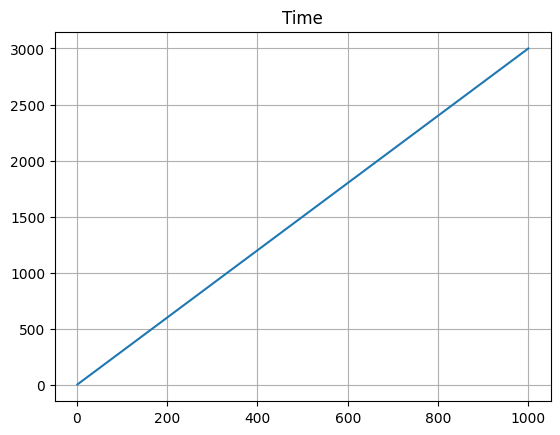

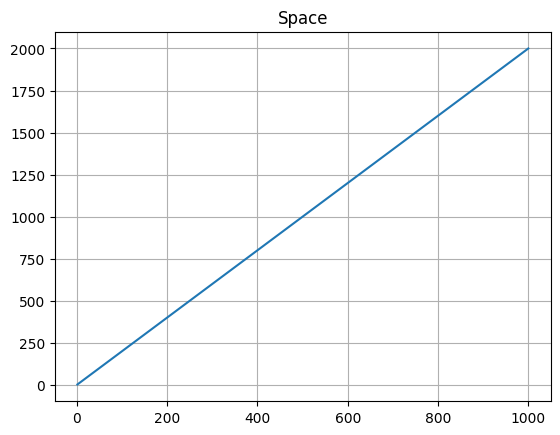

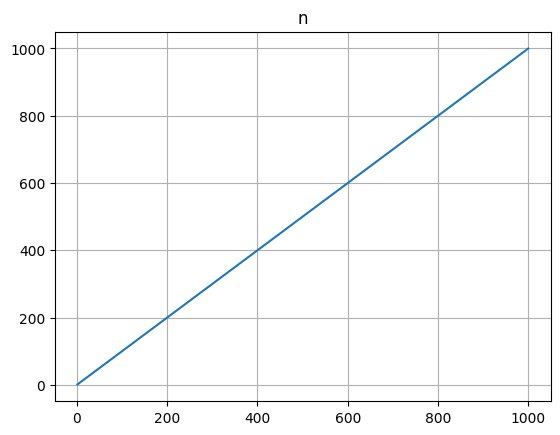

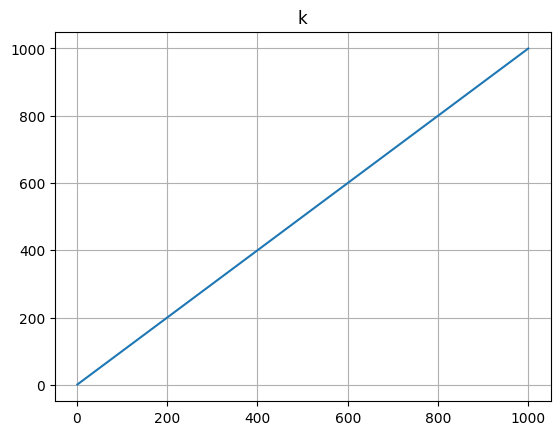

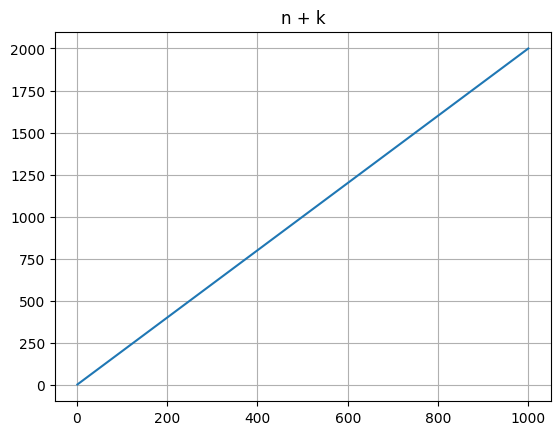

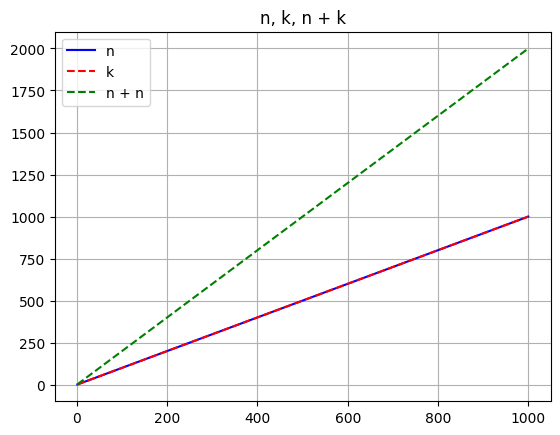

In [ ]:
MAX = 1000

x = []
y_time = []
y_space = []
y_k = []
y_n = []
y_nk = []
arr = []
aux = []
aux_aux = []
create_node_arr(arr, MAX, 0, 1, MAX+1)

for i in range(MAX):
    aux_aux.append(arr[i].value)

for i in range(MAX):
    aux.append(aux_aux[i])
    arr, time, space, n, k, nk = counting_sort_g(arr, aux)
    y_time.append(time)
    y_space.append(space)
    y_n.append(n)
    y_k.append(k)
    y_nk.append(nk)
    x.append(len(arr))

y_s = [y_time, y_space, y_n, y_k, y_nk]

for i in range(len(y_s)):
    if i == 0: plt.title('Time')
    if i == 1: plt.title('Space')
    if i == 2: plt.title('n')
    if i == 3: plt.title('k')
    if i == 4: plt.title('n + k')
    plt.plot(x, y_s[i])
    plt.grid(True)
    plt.show()
    
plt.title('n, k, n + k')
plt.plot(x, y_n, color = 'blue', label = "n")
plt.plot(x, y_k, color = 'red', linestyle = '--', label = "k")
plt.plot(x, y_nk, color = 'green', linestyle = '--', label = "n + n")
plt.grid(True)
plt.legend()
plt.show()

## **Radix Sort**
### **Algoritmo** (Prueba de Ordenamiento y Polinomio):

In [334]:
MAX = 20
def radix_sort(original_arr, aux_arr):                          # Temporal                      Espacial
    n = len(aux_arr)                                            # 4                             2
    k = max(aux_arr)                                            # 4                             2
    exp = 1                                                     # 3                             2
                                                                # d = n dígitos de k            
    while k // exp > 0:                                         # d*6                           
        temp_arr = [0] * n                                      # 5                             n+2
        position_arr = [0] * 10                                 # 5                             k+11
        i = 0                                                   # 3                             2
        while i < n:                                            # (n+1)*4                       1
            digit = (aux_arr[i] // exp) % 10                    # 8                             2
            position_arr[digit] += 1                            # 6                             2
            i += 1                                              # 5                             2
        i = 1                                                   # 3                             1
        while i < 10:                                           # k*4                           1
            position_arr[i] += position_arr[i - 1]              # 9                             2
            i += 1                                              # 5                             1
        i = n - 1                                               # 5                             1
        while i >= 0:                                           # (n+1)*5                       1
            digit = (aux_arr[i] // exp) % 10                    # 8                             2
            temp_arr[position_arr[digit] - 1] = original_arr[i] # 8                             2
            position_arr[digit] -= 1                            # 6                             2
            i -= 1                                              # 5                             1
        original_arr[:] = temp_arr                              # 3                             1
        exp *= 10                                               # 5                             1
    return original_arr                                         # 2
                                # primer while interno =        4(n+1)+n(19)                    n+k+45
                                # segundo while interno =       4k+k(14)
                                # terce while interno =         5(n+1)+n(27)
                                #                               ------------
                                # suma de whiles =              55n+19k+9
                                # ctes dentro del while d =     29
                                #                               ------------
                                # while externo =               d(55n+19k+38)
                                # ctes externas =               13
                                #                               ------------
                                # total =                       d(55n+19k+38)+13
arr = []
aux = []
# lista, tamaño, (0 = ordenado asc, 1 = ordenado desc, 2 = aleatorio, 3 = palabras), límite inf, límite sup)
create_node_arr(arr, MAX, 0, 0, MAX)
for i in range(MAX):
    aux.append(arr[i].value)
    print(arr[i])
print("-----------------")
arr = counting_sort(arr, aux)
for i in range(MAX):
    print(arr[i])

Nodo 1 -> 0
Nodo 2 -> 1
Nodo 3 -> 2
Nodo 4 -> 3
Nodo 5 -> 4
Nodo 6 -> 5
Nodo 7 -> 6
Nodo 8 -> 7
Nodo 9 -> 8
Nodo 10 -> 9
Nodo 11 -> 10
Nodo 12 -> 11
Nodo 13 -> 12
Nodo 14 -> 13
Nodo 15 -> 14
Nodo 16 -> 15
Nodo 17 -> 16
Nodo 18 -> 17
Nodo 19 -> 18
Nodo 20 -> 19
-----------------
Nodo 1 -> 0
Nodo 2 -> 1
Nodo 3 -> 2
Nodo 4 -> 3
Nodo 5 -> 4
Nodo 6 -> 5
Nodo 7 -> 6
Nodo 8 -> 7
Nodo 9 -> 8
Nodo 10 -> 9
Nodo 11 -> 10
Nodo 12 -> 11
Nodo 13 -> 12
Nodo 14 -> 13
Nodo 15 -> 14
Nodo 16 -> 15
Nodo 17 -> 16
Nodo 18 -> 17
Nodo 19 -> 18
Nodo 20 -> 19


### **Algortimo** (Gráfica):

In [412]:
def radix_sort_g(original_arr, aux_arr):
    n = len(aux_arr)
    k = max(aux_arr)
    exp = 1
    time = space = 0
    d = 0
    while k // exp > 0:
        d += 1
        temp_arr = [0] * n
        position_arr = [0] * 10
        i = 0
        while i < n:
            digit = (aux_arr[i] // exp) % 10
            position_arr[digit] += 1
            time += 1
            i += 1
        i = 1
        while i < 10:
            position_arr[i] += position_arr[i - 1]
            space += 1
            time += 1
            i += 1
        i = n - 1
        while i >= 0:
            space += 1
            digit = (aux_arr[i] // exp) % 10
            temp_arr[position_arr[digit] - 1] = original_arr[i - 1]
            position_arr[digit] -= 1
            time += 1
            i -= 1
        original_arr[:] = temp_arr
        exp *= 10

    return original_arr, time, space, n, k, d, n+k, d*(n + k)

## **Casos Mejor/Peor/Promedio**

### $O(d(n+k))$

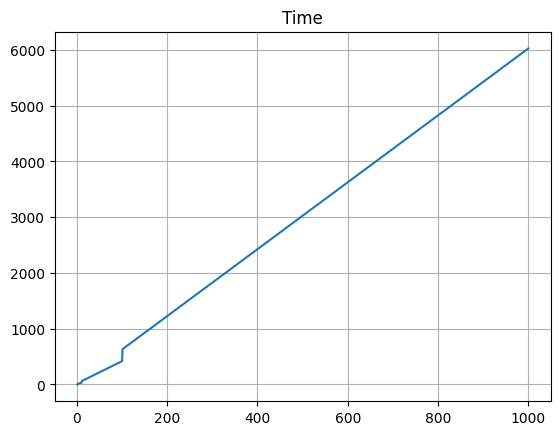

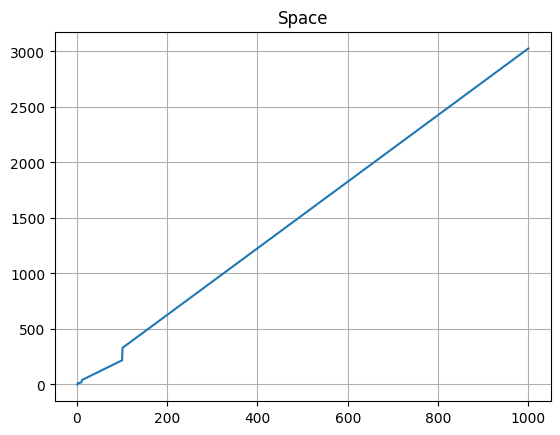

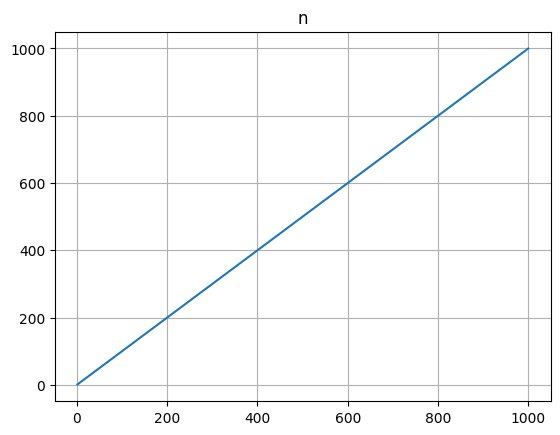

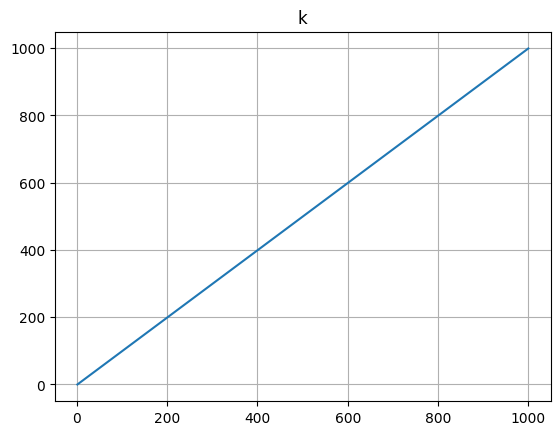

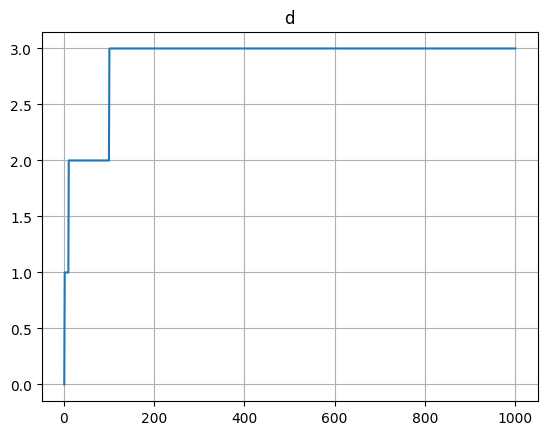

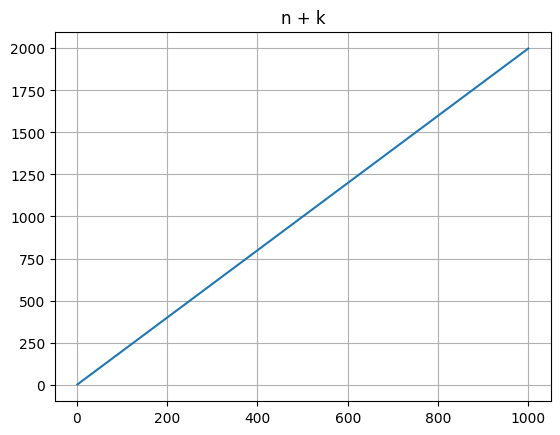

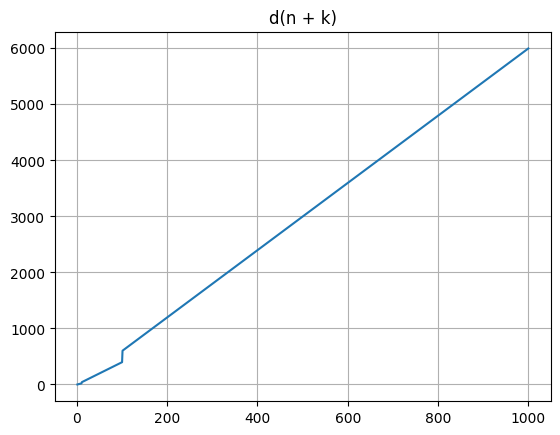

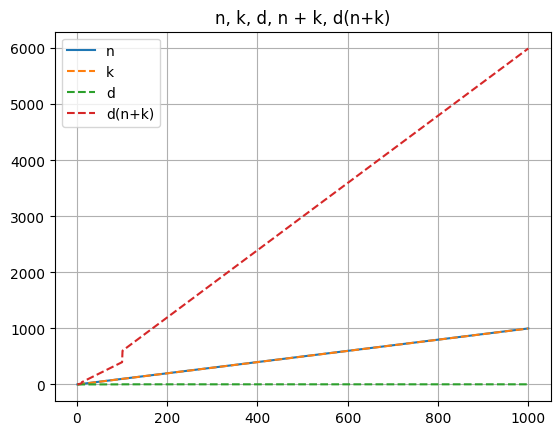

In [418]:
MAX = 1000

x = []
y_time = []
y_space = []
y_n = []
y_k = []
y_d = []
y_nk = []
y_nkd = []

arr = []
aux = []
aux_aux = []
create_node_arr(arr, MAX, 0, 0, MAX)

for i in range(MAX):
    aux_aux.append(arr[i].value)

for i in range(MAX):
    aux.append(aux_aux[i])
    arr, time, space, n, k, d, nk, nkd = radix_sort_g(arr[:i + 1], aux[:i + 1])
    y_time.append(time)
    y_space.append(space)
    y_n.append(n)
    y_k.append(k)
    y_d.append(d)
    y_nk.append(nk)
    y_nkd.append(nkd)
    x.append(len(arr))

y_s = [y_time, y_space, y_n, y_k, y_d, y_nk, y_nkd]

for i in range(len(y_s)):
    if i == 0: plt.title('Time')
    if i == 1: plt.title('Space')
    if i == 2: plt.title('n')
    if i == 3: plt.title('k')
    if i == 4: plt.title('d')
    if i == 5: plt.title('n + k')
    if i == 6: plt.title('d(n + k)')
    plt.plot(x, y_s[i])
    plt.grid(True)
    plt.show()
    
plt.title('n, k, d, n + k, d(n+k)')
plt.plot(x, y_n, label = "n")
plt.plot(x, y_k, linestyle = '--', label = "k")
plt.plot(x, y_d, linestyle = '--', label = "d")
plt.plot(x, y_nkd, linestyle = '--', label = "d(n+k)")
plt.grid(True)
plt.legend()
plt.show()